# Introduction to Reinforcement Learning

https://www.datacamp.com/community/tutorials/introduction-reinforcement-learning

Anubhav Singh, November 30th, 2018

In this tutorial, you'll learn the basic concepts and terminologies of reinforcement learning. At the end of the tutorial, we'll discuss the epsilon-greedy algorithm for applying reinforcement learning based solutions.


## Table of Contents

1. What is Reinforcement Learning?

2. Reinforcement Learning vs. the rest

3. Intuition to Reinforcement Learning

4. Basic concepts and Terminology

5. How Reinforcement Learning Works

6. Simple Implementation

7. Conclusion

8. References and Links

## What is Reinforcement Learning?

Reinforcement learning in formal terms is a method of machine learning wherein the software agent learns to perform certain actions in an environment which lead it to maximum reward. It does so by exploration and exploitation of knowledge it learns by repeated trials of maximizing the reward.

## Reinforcement Learning vs. the rest

Methods of machine learning, other than reinforcement learning are as shown below:

    Machine Learning
    |-- Supervised Learning
    |   |-- Continuous value prediction
    |   |-- Class/Label Prediction
    |-- Unsupervised Learning
    |   |-- Clustering/Labeling based on similarity
    |-- Reinforcement Learning
    |   |-- Agent learns to interact with environment to achieve a reward

One can conclude that while supervised learning predicts continuous ranged values or discrete labels/classes based on the training it receives from examples with provided labels or values. Unsupervised learning tries to club together samples based on their similarity and determine discrete clusters.

Reinforcement learning on the other hand, which is a subset of Unsupervised learning, performs learning very differently. It takes up the method of "cause and effect".

## Intuition to Reinforcement Learning

Let us try to understand the previously stated formal definition by means of an example.

Imagine you are supposed to cross an unknown field in the middle of a pitch black night without a torch. There can be pits and stones in the field, the position of those are unfamiliar to you. There's a simple rule - if you fall into a hole or hit a rock, you must start again from your initial point.

- You start walking forward blindly, only counting the number of steps you take
    + After x steps, you fall into a pit
    + Your reward was x points since you walked that many steps

- You start again from your initial position, but after x steps, you take a detour either left/right and again move forward
    + You hit a stone after y steps
    + This time your reward was y which is greater than x
    + You decide to take this path again but with more caution

- When you start again, you make a detour after x steps, another after y steps and manage to fall into another pit after z steps
    + This time the reward was z points which was greater than y, and you decide that this is a good path to take again

- You restart again, make the detours after x, y and z steps to reach the other side of the field
    + Thus, you've learned to cross the field without the need of light

## Basic Concept and Terminology

### Insight

In the above example, you are the agent who is trying to walk across the field, which is the environment. Walking is the action the agent performs on the environment. The distance the agent walks acts as the reward. The agent tries to perform the action in such a way that the reward maximizes. This is how Reinforcement Learning works in a nutshell. The following figure puts it into a simple diagram:

![](dct1_1.png){width=100%}

And in the proper technical terms, and generalizing to fit more examples into it, the diagram becomes:

![](dct1_2.png){width=100%}

### Terminology

Some important terms related to reinforcement learning are:

- Agent: a hypothetical entity which performs actions in an environment to gain some reward

- Action (a): All the possible moves that the agent can take

- Environment (e): A scenario the agent has to face

- State (s): Current situation returned by the environment

- Reward (R): An immediate return sent back from the environment to evaluate the last action by the agent

- Policy (π): The strategy that the agent employs to determine next action based on the current state

- Value (V): The expected long-term return with discount, as opposed to the short-term reward R
    + V_π(s) is defined as the expected long-term return of the current state s under policy π

- Q-value or action-value (Q): Q-value is similar to Value, except that it takes an extra parameter, the current action a
    + Q_π(s, a) refers to the long-term return of the current state s, taking action a under policy π

These terms are taken from Steeve Huang's post "Introduction to Various Reinforcement Learning Algorithms. Part I (Q-Learning, SARSA, DQN, DDPG)":

https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-i-q-learning-sarsa-dqn-ddpg-72a5e0cb6287

## How Reinforcement Learning Works

There are majorly three approaches to implement a reinforcement learning algorithm. They are:

- Value Based: in a value-based reinforcement learning method, you try to maximize a value function V(s)
    + As defined in the terminology previously, Vπ(s) is the expected long-term return of the current state s under policy π
    + Thus, V(s) is the value of reward which the agent expects to gain in the future upon starting at that state s

    V_π(s) = E_π[R_t+1 + g R_t+2 + g^2 R_t+3 + ... | S_t = s]

- Policy-based: in a policy-based reinforcement learning method, you try to come up with a policy such that the action performed at each state is optimal to gain maximum reward in the future
    + Here, no value function is involved
    + We know that the policy π determines the next action a at any state s
    + There are two types of policy-based RL methods:

1. Deterministic: at any state s, the same action a is produced by the policy π

2. Stochastic: each action has a certain probability, given by the equation below:

    Stochastic Policy: π(a | s) = P[A_t = a | S_t = s]

- Model-Based: in this type of reinforcement learning, you create a virtual model for each environment, and the agent learns to perform in that specific environment
    + Since the model differs for each environment, there is no singular solution or algorithm for this type

## A Simple Implementation

Reinforcement Learning comes with its own classic example - the Multi-Armed Bandit problem. Never heard? No worries! Here's what it is - assume you're at a casino and in a section with some slot machines. Let's say you're at a section with 10 slot machines in a row and it says "Play for free! Max payout is 10 dollars" Each slot machine is guaranteed to give you a reward between 0 and 10 dollars. Each slot machine has a different average payout, and you have to figure out which one gives the most average reward so that you can maximize your reward in the shortest time possible.

>But why is it called the Multi-Armed Bandit problem? Think of the slot machine as a one-armed (single lever) bandit (because it generally steals your money!). Multiple slot machines, thus multi-armed bandit.

And if you're still wondering, this is what a slot machine looks like:

![Slot Machine, Source: Futurity](dct1_6.jpg){width=100%}

One very obvious approach would be to pull the same lever every time. The probability of hitting the jackpot being very low, you'd mostly be losing money by doing this. Formally, this can be defined as a pure exploitation approach.

Alternatively, you could pull the lever of each slot machine in hopes that at least one of them would hit the jackpot. This is another naive approach which would give you sub-optimal returns. Formally this approach is a pure exploration approach.

ϵ (epsilon)-greedy algorithm

One very famous approach to solving reinforcement learning problems is the ϵ (epsilon)-greedy algorithm, such that, with a probability ϵ, you will choose an action a at random (exploration), and the rest of the time (probability 1 − ϵ) you will select the best lever based on what you currently know from past plays (exploitation). So most of the time you play greedy, but sometimes you take some risks and choose a random lever and see what happens.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(5)

First, import the necessary libraries and modules required to implement the algorithm.

In [2]:
n = 10
arms = np.random.rand(n)
eps = 0.1  # Probability of exploration action

You'll be solving the 10-armed bandit problem, hence n = 10. arms is a numpy array of length n filled with random floats that can be understood as probabilities of action of that arm.

In [3]:
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

The reward functions work as such - for each arm, you run a loop of 10 iterations, and generate a random float every time. If this random number is less than the probability of that arm, you'll add a 1 to the reward. After all iterations, you'll have a value between 0 to 10.

>Why do you add a 1 only when the random number is less than the probability of that arm? Why not when it is more? The answer is, say you have a probability of 0.8 for an arm. You want 8 out of 10 times a positive response. That indicates that the positive response should be to the left of the probability value on the number line.

In [4]:
# Initialize memory array; has 1 row defaulted to random action index
# av = action-value
av = np.array([np.random.randint(0, (n + 1)), 0]).reshape(1, 2) 

In [5]:
# Greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0  # Default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:, 0] == u[0])][:, 1])  # Calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm

The next function you define is your greedy strategy of choosing the best arm so far. This function accepts a memory array that stores the history of all actions and their rewards. It is a 2 x k matrix where each row is an index reference to your arms array (1st element), and the reward received (2nd element). For example, if a row in your memory array is [2, 8], it means that action 2 was taken (the 3rd element in our arms array) and you received a reward of 8 for taking that action.

And here is the main loop for each play. Let's play it 500 times and display a matplotlib scatter plot of the mean reward against the number of times the game is played.

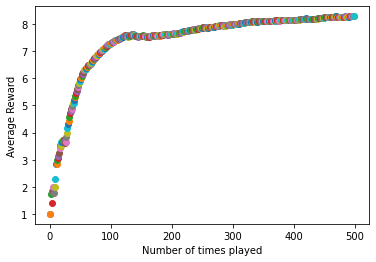

In [6]:
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")

for i in range(500):
    if random.random() > eps:  # Greedy exploitation action
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else:  # Exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]])  # Choice, reward
        av = np.concatenate((av, thisAV), axis=0)  # Add to our action-value memory array
    # Calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)

As expected, your agent learns to choose the arm which gives it the maximum average reward after several iterations of gameplay. Thus, you've implemented a straightforward reinforcement learning algorithm to solve the Multi-Arm Bandit problem.



## Conclusion

Reinforcement learning is becoming more popular today due to its broad applicability to solving problems relating to real-world scenarios. It has found significant applications in the fields such as -

- Game Theory and Multi-Agent Interaction: reinforcement learning has been used extensively to enable game playing by software
    + A recent example would be Google's DeepMind (https://deepmind.com/), which was able to defeat the world's highest ranked Go player and later, the highest rated Chess program Komodo

- Robotics: robots have often relied upon reinforcement learning to perform better in the environment they are presented with
    + Reinforcement learning comes with the benefit of being a play and forget solution for robots which may have to face unknown or continually changing environments
    + One well-known example is the Learning Robots by Google X project (https://x.company/projects/)

- Vehicle navigation: vehicles learn to navigate the track better as they make re-runs on the track
    + A proof of concept is presented in this video while a real-life world example was presented at the O'Reilly AI Conference in this video

- Industrial Logistics: industry tasks are often automated with the help of reinforcement learning
    + The software agent facilitating it gets better at its task as time passes
    + BonsAI is a startup working to bring such AI to the industries

There are many more reinforcement learning algorithms to explore and quite a few that perform better than the simple algorithm we've demonstrated above. Do check out the References and Links for some quick places to start with your exploration, and mix it with the exploitation of this tutorial to reinforce your learning of the topic.

If you would like to learn more in Python, take DataCamp's 'Machine Learning for Time Series Data in Python' course:

https://learn.datacamp.com/courses/machine-learning-for-time-series-data-in-python


## References and Links

### References

Sutton, Richard S. and Barto, Andrew G., Reinforcement Learning: An Introduction, MIT Press, 1998

http://incompleteideas.net/book/the-book.html

The Reinforcement Learning Repository, University of Massachusetts, Amherst

https://all.cs.umass.edu/rlr/

Wikipedia article on Reinforcement Learning

https://en.wikipedia.org/wiki/Reinforcement_learning

A Beginners Guide to Deep Reinforcement Learning

https://skymind.ai/wiki/deep-reinforcement-learning [dead link]

### Links

If you still have doubts or wish to read up more about reinforcement learning, these links can be a great starting point:

A Glossary of terms in Reinforcement Learning

https://all.cs.umass.edu/rlr/terms.html

Bibliography on Reinforcement Learning

http://liinwww.ira.uka.de/bibliography/Neural/reinforcement.learning.html

David J. Finton's Reinforcement Learning Page

http://pages.cs.wisc.edu/~finton/rlpage.html

Stanford University Andrew Ng Lecture on Reinforcement Learning

https://www.youtube.com/watch?v=RtxI449ZjSc&feature=relmfu